# Step 0: Import the relevent libraries & Database

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-crime-jan-2020/2020-01-metropolitan-street.csv


In [2]:
df = pd.read_csv('/kaggle/input/london-crime-jan-2020/2020-01-metropolitan-street.csv')

# Step 1: Data Understanding.

In [3]:
# Here we can see the head of the dataset, in the first input in this notebook, we set pd.set_option('display.max_columns', 200).
# The purpose of this is so we can see every column in the dataset, as pandas by default will cut half of this away.
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [4]:
# Sometimes its easier to run .columns on the dataframe, as this will show all the columns as a list, 
# which may be easier to read instead of being blinded by data like above.
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [5]:
# This shape will tell us how many rows & columns the dataset has
df.shape

(90979, 12)

In [6]:
# In every pandas dataframe, every column is a series, and every pandas series has a type
# objects are a string type columns, some are float values
df.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [7]:
# Show some information & statistics about the numeric data in the dataset
df.describe()

,Longitude,Latitude,Context
count,90435.000000,90435.000000,0.0
mean,-0.121390,51.511320,NaN
std,0.155808,0.081744,NaN
min,-5.545210,50.100792,NaN
25%,-0.200683,51.470369,NaN
50%,-0.117239,51.514983,NaN
75%,-0.033239,51.553906,NaN
max,1.733734,55.020499,NaN


# Step 2: Data Preperation & Data Cleaning
- Dropping irrelevant columns & rows
- Identifying duplicated columns
- Renaming columns 
- Feature Creation

In [8]:
# creating a subset of the df, as from a quick look, crime ID, long/lat & LSOA code won't mean much in this analysis
# we are just commenting out alot of the data we dont need & creating a subset of data

df = df[[#'Crime ID', 
        'Month', 'Reported by', 'Falls within', 
        #'Longitude','Latitude', 
        'Location', 
        #'LSOA code', 
        'LSOA name', 'Crime type',
       'Last outcome category', 'Context']].copy()

In [9]:
df.head()

,Month,Reported by,Falls within,Location,LSOA name,Crime type,Last outcome category,Context
0,2020-01,Metropolitan Police Service,Metropolitan Police Service,On or near Highdown Drive,Arun 009F,Other theft,Status update unavailable,NaN
1,2020-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,2020-01,Metropolitan Police Service,Metropolitan Police Service,On or near Beansland Grove,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,2020-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,2020-01,Metropolitan Police Service,Metropolitan Police Service,On or near Furze Farm Close,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [10]:
# Looking at month, it will be more useful to convert this to a date/time format
df.dtypes

Month                     object
Reported by               object
Falls within              object
Location                  object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [11]:
# Convert the dtypes for month from an object to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month                    datetime64[ns]
Reported by                      object
Falls within                     object
Location                         object
LSOA name                        object
Crime type                       object
Last outcome category            object
Context                         float64
dtype: object

In [12]:
# Tidy up the column names
df = df.rename(columns = {'Month': 'Date',
                    'Reported by': 'Reporting_Police_Force',
                    'Falls within': 'Police_Jurisdiction',
                    'LSOA name': 'LSOA_Name',
                     'Crime type': 'Crime_Type',
                    'Last outcome category': 'Last_Outcome_Category',
                    })

In [13]:
# Removing the area code off the name, just to clean this column up a little bit more
df['LSOA_Name'] = df['LSOA_Name'].str[:-5]

In [14]:
# 90979, 12 is the shape of the dataframe, we have 90979 in context, so its useless so we can drop this
df.isna().sum()

Date                          0
Reporting_Police_Force        0
Police_Jurisdiction           0
Location                      0
LSOA_Name                   544
Crime_Type                    0
Last_Outcome_Category     17548
Context                   90979
dtype: int64

In [15]:
# Dropping columns which have too much missing data
df = df.drop(['Context'], axis=1)

In [16]:
df.head()

,Date,Reporting_Police_Force,Police_Jurisdiction,Location,LSOA_Name,Crime_Type,Last_Outcome_Category
0,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Highdown Drive,Arun,Other theft,Status update unavailable
1,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
2,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Beansland Grove,Barking and Dagenham,Anti-social behaviour,NaN
3,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
4,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Furze Farm Close,Barking and Dagenham,Anti-social behaviour,NaN


In [17]:
# We have quite a lot of duplications, however due to the nature of this data, its not too surprising
df.duplicated().sum()

28923

In [18]:
# running a .loc on the duplications, we can see a snippit of what the duplications look like
df.loc[df.duplicated()]

,Date,Reporting_Police_Force,Police_Jurisdiction,Location,LSOA_Name,Crime_Type,Last_Outcome_Category
3,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
5,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
6,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
8,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
12,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,On or near Gibbfield Close,Barking and Dagenham,Criminal damage and arson,Awaiting court outcome
...,...,...,...,...,...,...,...
90971,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Investigation complete; no suspect identified
90972,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Investigation complete; no suspect identified
90973,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Status update unavailable
90974,2020-01-01,Metropolitan Police Service,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Investigation complete; no suspect identified


In [19]:
# here we can see both the reporting police force and the jurisdiction is both the met police service,
# so we might as well drop one of these.
df.duplicated(subset=['Reporting_Police_Force']).sum()
df.duplicated(subset=['Police_Jurisdiction']).sum()

90978

In [20]:
# Dropping the jurisdiction as we know its the same as reported.
df = df.drop(['Police_Jurisdiction'], axis=1)

In [21]:
# Checking that the date is Jan 2020 for all reported crime, which it is
df['Date'].value_counts()

Date
2020-01-01    90979
Name: count, dtype: int64

# Step 3: Feature Understanding

(Univariate analysis)
- Plotting Histograms using matplotlib & ggplot, along with a simple Piechart

Text(0, 0.5, 'Count')

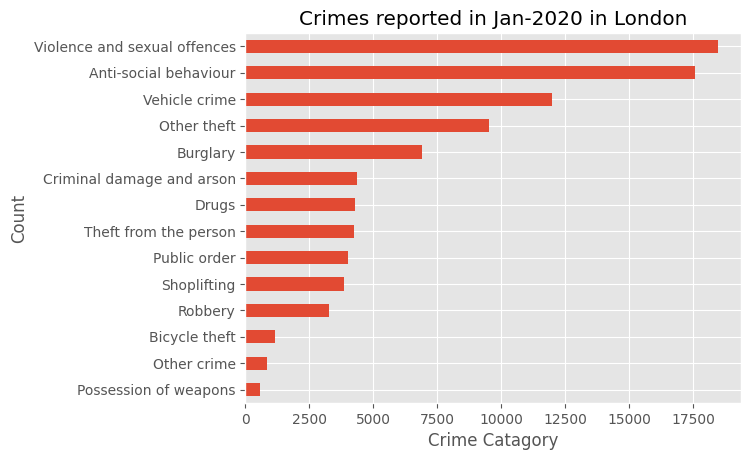

In [22]:
# Here we can see a simple bar chart visualising the different crimes reported in Jan-2020
ax = df['Crime_Type'].value_counts() \
.sort_values(ascending=True) \
.plot(kind='barh', title='Crimes reported in Jan-2020 in London') \


ax.set_xlabel('Crime Catagory')
ax.set_ylabel('Count')

In [23]:
# Here is a summery of each crime reported in Jan-2020 in London
df['Crime_Type'].value_counts()

Crime_Type
Violence and sexual offences    18451
Anti-social behaviour           17548
Vehicle crime                   11975
Other theft                      9497
Burglary                         6889
Criminal damage and arson        4374
Drugs                            4282
Theft from the person            4256
Public order                     4025
Shoplifting                      3853
Robbery                          3263
Bicycle theft                    1172
Other crime                       832
Possession of weapons             562
Name: count, dtype: int64

In [24]:
df.columns

Index(['Date', 'Reporting_Police_Force', 'Location', 'LSOA_Name', 'Crime_Type',
       'Last_Outcome_Category'],
      dtype='object')

In [25]:
# Here we can see Westminster has the highest reported crime rate in all of London,
# We can do further investigation into this, to see which crimes are reported.
df.groupby('LSOA_Name').count()['Crime_Type'].sort_values(ascending = False)

LSOA_Name
Westminster      7226
Camden           3920
Tower Hamlets    3644
Southwark        3590
Lambeth          3549
                 ... 
Rochford            1
Rotherham           1
Rugby               1
Sandwell            1
Manchester          1
Name: Crime_Type, Length: 126, dtype: int64

In [26]:
print("List of boroughs: ")
print(df['LSOA_Name'].unique())

List of boroughs: 
['Arun' 'Barking and Dagenham' 'Barnet' 'Basildon' 'Bedford' 'Bexley'
 'Birmingham' 'Bracknell Forest' 'Bradford' 'Brent' 'Brentwood' 'Bromley'
 'Broxbourne' 'Bury' 'Camden' 'Castle Point' 'Central Bedfordshire'
 'Chelmsford' 'Cheshire West and Chester' 'Chiltern' 'City of London'
 'Conwy' 'Cornwall' 'County Durham' 'Crawley' 'Croydon' 'Dacorum'
 'Dartford' 'Denbighshire' 'Derbyshire Dales' 'Ealing'
 'East Hertfordshire' 'Elmbridge' 'Enfield' 'Epping Forest'
 'Epsom and Ewell' 'Exeter' 'Flintshire' 'Gravesham' 'Great Yarmouth'
 'Greenwich' 'Hackney' 'Hammersmith and Fulham' 'Haringey' 'Harlow'
 'Harrow' 'Hastings' 'Havering' 'Herefordshire' 'Hertsmere' 'Hillingdon'
 'Horsham' 'Hounslow' 'Islington' 'Kensington and Chelsea'
 'Kingston upon Thames' 'Lambeth' 'Leeds' 'Lewisham' 'Liverpool' 'Luton'
 'Maidstone' 'Maldon' 'Manchester' 'Medway' 'Merton' 'Mid Sussex'
 'Milton Keynes' 'Newham' 'Newport' 'Northampton' 'North Devon'
 'North Tyneside' 'Northumberland' 'North War

Text(0, 0.5, 'Count')

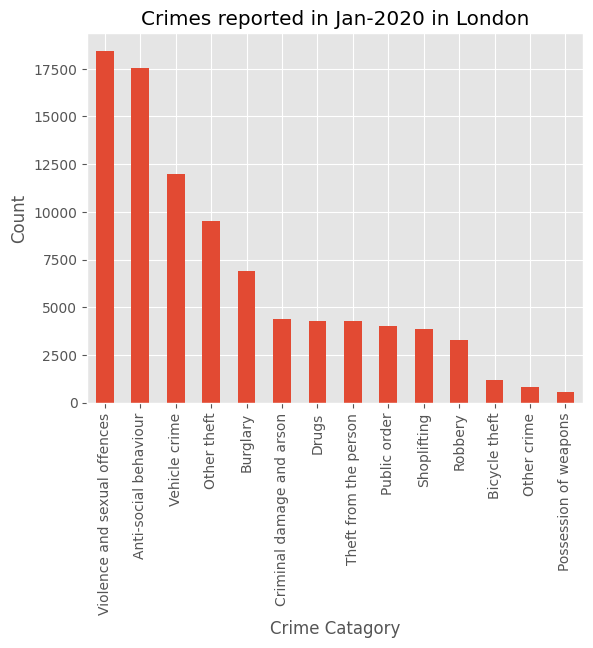

In [27]:
# Plotted a simple bar chart, showing the most reported crime in Westminster
ax = df['Crime_Type'].value_counts() \
.plot(kind='bar', title='Crimes reported in Jan-2020 in London')

ax.set_xlabel('Crime Catagory')
ax.set_ylabel('Count')

In [28]:
filtered_crimes_df = df[~df['Crime_Type'].isin(['Other crime', 'Other theft'])]
filtered_crimes_df

,Date,Reporting_Police_Force,Location,LSOA_Name,Crime_Type,Last_Outcome_Category
1,2020-01-01,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
2,2020-01-01,Metropolitan Police Service,On or near Beansland Grove,Barking and Dagenham,Anti-social behaviour,NaN
3,2020-01-01,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
4,2020-01-01,Metropolitan Police Service,On or near Furze Farm Close,Barking and Dagenham,Anti-social behaviour,NaN
5,2020-01-01,Metropolitan Police Service,On or near Police Station,Barking and Dagenham,Anti-social behaviour,NaN
...,...,...,...,...,...,...
90970,2020-01-01,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Awaiting court outcome
90971,2020-01-01,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Investigation complete; no suspect identified
90972,2020-01-01,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Investigation complete; no suspect identified
90973,2020-01-01,Metropolitan Police Service,No Location,NaN,Violence and sexual offences,Status update unavailable


Text(0, 0.5, 'Count')

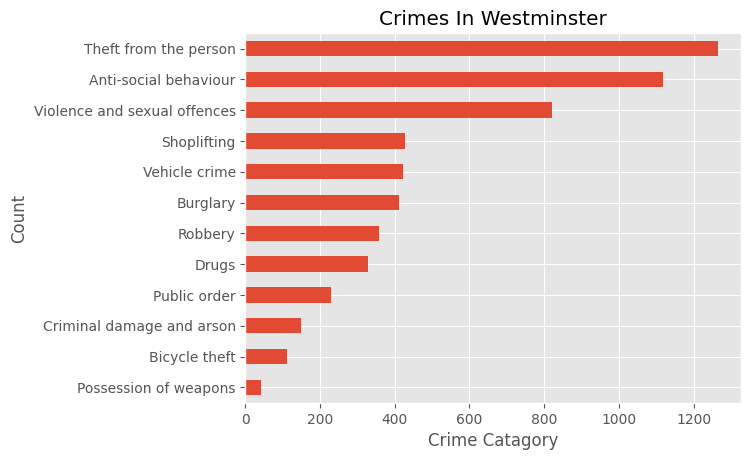

In [29]:
ax = filtered_crimes_df.query('LSOA_Name == "Westminster"')['Crime_Type'] \
    .value_counts() \
    .sort_values(ascending=True) \
    .plot(kind='barh', title='Crimes In Westminster')

ax.set_xlabel('Crime Catagory')
ax.set_ylabel('Count')

[]

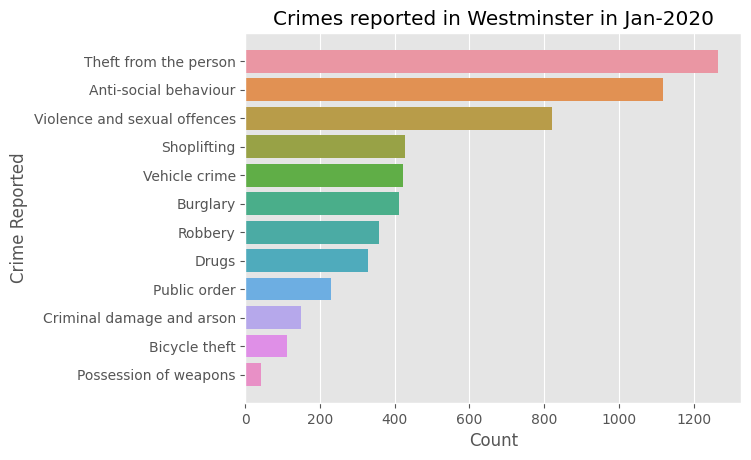

In [30]:
# Plotting the same graph as above, but renaming the columns & making it look more presentable
# As we can see, theft is the more frequent crime reported in this area

westminster_crimestypes = filtered_crimes_df.query('LSOA_Name == "Westminster"')['Crime_Type'] \
    .value_counts() \
    .sort_values(ascending=False) \
    .reset_index()

westminster_crimestypes.columns = ['Crime_Type', 'Count']


ax = sns.barplot(x = 'Count', y='Crime_Type', data=westminster_crimestypes)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Reported')
ax.set_title('Crimes reported in Westminster in Jan-2020')
ax.plot()

In [31]:
# In comparrison to Westminster, the greatest crime reported is Anti-social behaviour
df.query('LSOA_Name == "Camden"')['Crime_Type'].value_counts()

Crime_Type
Anti-social behaviour           762
Other theft                     727
Violence and sexual offences    524
Theft from the person           433
Vehicle crime                   306
Burglary                        272
Drugs                           218
Public order                    157
Shoplifting                     143
Criminal damage and arson       134
Robbery                         129
Bicycle theft                    86
Possession of weapons            22
Other crime                       7
Name: count, dtype: int64

[]

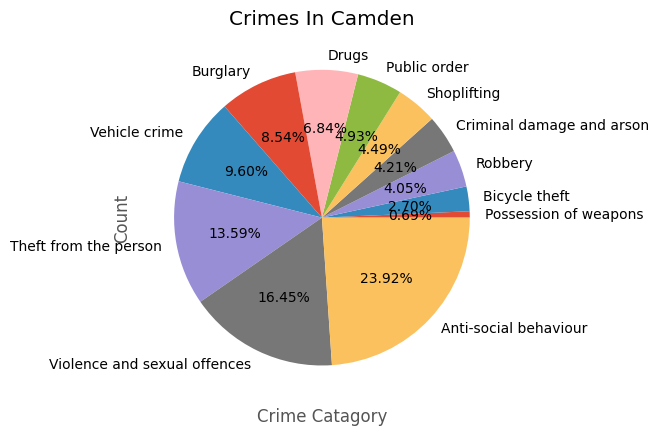

In [32]:
# Here we plot a pie chart, showing the pertentages as a comparrison to Westminster

df_column_drops = df[~df['Crime_Type'].isin(['Other crime', 'Other theft'])]

ax = df_column_drops.query('LSOA_Name == "Camden"')['Crime_Type'] \
    .value_counts() \
    .sort_values(ascending=True) \
    .plot(kind='pie', title='Crimes In Camden', autopct='%.2f%%')

ax.set_xlabel('Crime Catagory')
ax.set_ylabel('Count')
ax.plot()

# Step 4: Asking a question about the data using a plot or statistic
- What is the correlation between drug use & theft

In [33]:
# Here we can create a pivot table, which removes the columns other crime & other theft, as 
# they dont provide any meaningful statistics

df_table = df[~df['Crime_Type'].isin(['Other crime', 'Other theft'])] \
.pivot_table(columns = ['Crime_Type'], index='LSOA_Name', aggfunc= 'count')

df_table_sorted = df_table.sort_values(by=df_table.columns.tolist(), ascending=False)

print("Pivot Table, showing the statistics of each crime in each borough")

display(df_table_sorted.iloc[:10, :])

Pivot Table, showing the statistics of each crime in each borough


Date                         \
Crime_Type    Anti-social behaviour Bicycle theft Burglary   
LSOA_Name                                                    
Westminster                  1119.0         111.0    411.0   
Tower Hamlets                1014.0          85.0    262.0   
Ealing                        829.0          20.0    251.0   
Camden                        762.0          86.0    272.0   
Lambeth                       758.0          68.0    241.0   
Brent                         737.0          17.0    223.0   
Southwark                     719.0          91.0    241.0   
Newham                        672.0          17.0    190.0   
Haringey                      653.0          25.0    178.0   
Hackney                       652.0          86.0    193.0   

                                                                      \
Crime_Type    Criminal damage and arson  Drugs Possession of weapons   
LSOA_Name                                                              
Westminster                       149.0  329.0                  41.0   
Tower Hamlets                     171.0  216.0                  19.0   
Ealing                            199.0  155.0                  18.0   
Camden                            134.0  218.0                  22.0   
Lambeth                           179.0  222.0                  28.0   
Brent                             157.0  126.0                  14.0   
Southwark                         160.0  175.0                  22.0   
Newham                            152.0  209.0                  11.0   
Haringey                          114.0  132.0                  14.0   
Hackney                           142.0  144.0                  18.0   

                                                                      \
Crime_Type    Public order Robbery Shoplifting Theft from the person   
LSOA_Name                                                              
Westminster          229.0   359.0       428.0                1265.0   
Tower Hamlets        173.0   121.0        74.0                 152.0   
Ealing               170.0    83.0       110.0                  52.0   
Camden               157.0   129.0       143.0                 433.0   
Lambeth              186.0    98.0        85.0                 205.0   
Brent                141.0   100.0        94.0                  62.0   
Southwark            168.0   172.0        81.0                 193.0   
Newham               162.0   209.0       179.0                 165.0   
Haringey             106.0   201.0       176.0                 125.0   
Hackney              136.0   166.0        79.0                 252.0   

                                                          \
Crime_Type    Vehicle crime Violence and sexual offences   
LSOA_Name                                                  
Westminster           423.0                        822.0   
Tower Hamlets         335.0                        667.0   
Ealing                504.0                        699.0   
Camden                306.0                        524.0   
Lambeth               374.0                        708.0   
Brent                 437.0                        668.0   
Southwark             400.0                        751.0   
Newham                371.0                        767.0   
Haringey              407.0                        558.0   
Hackney               293.0                        672.0   

              Last_Outcome_Category                         \
Crime_Type    Anti-social behaviour Bicycle theft Burglary   
LSOA_Name                                                    
Westminster                     0.0         111.0    411.0   
Tower Hamlets                   0.0          85.0    262.0   
Ealing                          0.0          20.0    251.0   
Camden                          0.0          86.0    272.0   
Lambeth                         0.0          68.0    241.0   
Brent                           0.0          17.0    223.0   
Southwark  

In [34]:
print("The corrolation between drug use & robbery = ", df_table[('Date', 'Robbery')].corr(df_table[('Date', 'Drugs')]))
print("The corrolation between drug use & shop lifting = ", df_table[('Date', 'Shoplifting')].corr(df_table[('Date', 'Drugs')]))

The corrolation between drug use & robbery =  0.7376017622059313
The corrolation between drug use & shop lifting =  0.5982733159391259


- 0.74 indicates a strong positive correlation between drug-related crimes and robbery.
- 0.6 indicates a moderately positive correlation between drug-related crimes and shoplifting.

### While the correlation is not as strong as with robbery, it still suggests a tendency for areas with higher drug-related crimes to also have higher rates of shoplifting, and vice versa.

### Feedback is welcome